<a href="https://colab.research.google.com/github/ElZho/ElZho/blob/main/IsFraud_D_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
data_train_full = pd.read_csv(path_to_data,  usecols=['TransactionID', 'TransactionDT','card1',  'D1', 'D2', 'D3', 'D4', 'D5',
                  'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'])
data_train_full.head()

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,2987000,86400,13926,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN
1,2987001,86401,2755,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2987002,86469,4663,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN
3,2987003,86499,18132,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN
4,2987004,86506,4497,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in ['D1', 'D2', 'D3', 'D4', 'D5',
                  'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14']:
  print(col, '---', len(data_train_full[col].unique())  )                

D1 --- 642
D2 --- 642
D3 --- 650
D4 --- 809
D5 --- 689
D6 --- 830
D7 --- 598
D8 --- 12354
D9 --- 25
D10 --- 819
D11 --- 677
D12 --- 636
D13 --- 578
D14 --- 803


In [55]:
for col in ['D1', 'D2', 'D3', 'D4', 'D5',
                  'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14']:
  print(col, '---', round(data_train_full[col].isna().sum()/data_train_full.shape[0],2) ) 

D1 --- 0.0
D2 --- 0.48
D3 --- 0.45
D4 --- 0.29
D5 --- 0.52
D6 --- 0.88
D7 --- 0.93
D8 --- 0.87
D9 --- 0.87
D10 --- 0.13
D11 --- 0.47
D12 --- 0.89
D13 --- 0.9
D14 --- 0.89


In [7]:
pd.to_datetime(data_train_full['TransactionDT'])

0        1970-01-01 00:00:00.000086400
1        1970-01-01 00:00:00.000086401
2        1970-01-01 00:00:00.000086469
3        1970-01-01 00:00:00.000086499
4        1970-01-01 00:00:00.000086506
                      ...             
590535   1970-01-01 00:00:00.015811047
590536   1970-01-01 00:00:00.015811049
590537   1970-01-01 00:00:00.015811079
590538   1970-01-01 00:00:00.015811088
590539   1970-01-01 00:00:00.015811131
Name: TransactionDT, Length: 590540, dtype: datetime64[ns]

In [9]:
data_train_full['TransactionDT']-data_train_full['D1']

0            86386.0
1            86401.0
2            86469.0
3            86387.0
4            86506.0
             ...    
590535    15811018.0
590536    15811049.0
590537    15811079.0
590538    15811066.0
590539    15811131.0
Length: 590540, dtype: float64

In [12]:
len(data_train_full['card1'].unique())

13553

In [13]:
data_train_full['D9'].unique()

array([     nan, 0.      , 0.041666, 0.083333, 0.125   , 0.166666,
       0.208333, 0.25    , 0.291666, 0.333333, 0.416666, 0.458333,
       0.5     , 0.541666, 0.583333, 0.625   , 0.666666, 0.708333,
       0.75    , 0.791666, 0.833333, 0.875   , 0.916666, 0.958333,
       0.375   ])

In [15]:
24*0.041666, 24*0.125, 24*0.875, 24*0.958333, 24*0.208333, 

(0.999984, 3.0, 21.0, 22.999992, 4.999992)

In [16]:
data_train_full['day']=data_train_full['TransactionDT']-data_train_full['D1']

In [18]:
data=data_train_full.groupby(['card1', 'day'])['TransactionDT'].count()

In [19]:
data

card1  day       
1000   5787419.0     1
1001   916268.0      1
       3504150.0     1
       5270407.0     1
1004   842821.0      1
                    ..
18395  10938175.0    1
       10964885.0    1
       11806832.0    1
       12865448.0    1
18396  2231501.0     1
Name: TransactionDT, Length: 589123, dtype: int64

In [51]:
data_train_full[data_train_full['card1']==5812][['card1', 'D1', 'D2','TransactionDT']].sort_values(by='D1').tail(50)

,card1,D1,D2,TransactionDT
237846,5812,456.0,456.0,5611914
347975,5812,458.0,458.0,8567343
386402,5812,461.0,461.0,9678312
389134,5812,462.0,462.0,9756675
409046,5812,462.0,462.0,10342350
401915,5812,462.0,462.0,10130024
347572,5812,463.0,NaN,8557294
183781,5812,464.0,464.0,4064105
554424,5812,469.0,469.0,14661812
523930,5812,471.0,471.0,13756001


In [53]:
data_train_full[~data_train_full['D2'].isna()].query('D1!=D2')

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day
45,2987045,87275,16132,91.0,68.0,23.0,289.0,46.0,NaN,NaN,NaN,NaN,289.0,289.0,NaN,NaN,NaN,87184.0
64,2987064,87611,3278,238.0,32.0,0.0,237.0,0.0,NaN,NaN,NaN,NaN,331.0,NaN,NaN,NaN,NaN,87373.0
77,2987077,87793,3278,238.0,32.0,0.0,237.0,0.0,NaN,NaN,NaN,NaN,331.0,NaN,NaN,NaN,NaN,87555.0
126,2987126,88579,11279,369.0,171.0,36.0,369.0,36.0,NaN,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,88210.0
147,2987147,88819,11279,369.0,171.0,0.0,369.0,0.0,NaN,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,88450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590392,3577392,15808149,16085,350.0,65.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,66.0,NaN,NaN,NaN,15807799.0
590420,3577420,15808959,11893,625.0,610.0,15.0,651.0,15.0,NaN,NaN,NaN,NaN,651.0,625.0,NaN,NaN,NaN,15808334.0
590461,3577461,15809682,17400,154.0,146.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,118.0,154.0,NaN,NaN,NaN,15809528.0
590503,3577503,15810372,12873,472.0,471.0,6.0,472.0,6.0,NaN,NaN,NaN,NaN,472.0,6.0,NaN,NaN,NaN,15809900.0


In [57]:
22434/data_train_full.shape[0]

0.03798895925762861

In [56]:
data_train_full[~data_train_full['D3'].isna()]

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day
0,2987000,86400,13926,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,86386.0
3,2987003,86499,18132,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,86387.0
9,2987009,86536,17399,61.0,61.0,30.0,318.0,30.0,NaN,NaN,NaN,NaN,40.0,302.0,NaN,NaN,NaN,86475.0
10,2987010,86549,16496,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,86548.0
12,2987012,86564,3786,72.0,72.0,11.0,107.0,11.0,NaN,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,86492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590532,3577532,15811007,12037,315.0,315.0,315.0,315.0,315.0,NaN,NaN,NaN,NaN,315.0,0.0,NaN,NaN,NaN,15810692.0
590533,3577533,15811029,13071,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,15811023.0
590535,3577535,15811047,6550,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,15811018.0
590538,3577538,15811088,7826,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,15811066.0


In [ ]:
D6 --- 0.88
D7 --- 0.93
D8 --- 0.87
D9 --- 0.87

D12 --- 0.89
D13 --- 0.9
D14 --- 0.89

In [ ]:
D6 --- 830
D7 --- 598
D8 --- 12354
D9 --- 25


D12 --- 636
D13 --- 578

In [ ]:
D4 --- 809
D6 --- 830
D10 --- 819
D14 --- 803

In [66]:
for col in ['D6', 'D10', 'D14']:
  f=[col,'D4']
  print(f, '--', data_train_full[f].corr()['D4'])

['D6', 'D4'] -- D6    0.956966
D4    1.000000
Name: D4, dtype: float64
['D10', 'D4'] -- D10    0.636928
D4     1.000000
Name: D4, dtype: float64
['D14', 'D4'] -- D14    0.135268
D4     1.000000
Name: D4, dtype: float64


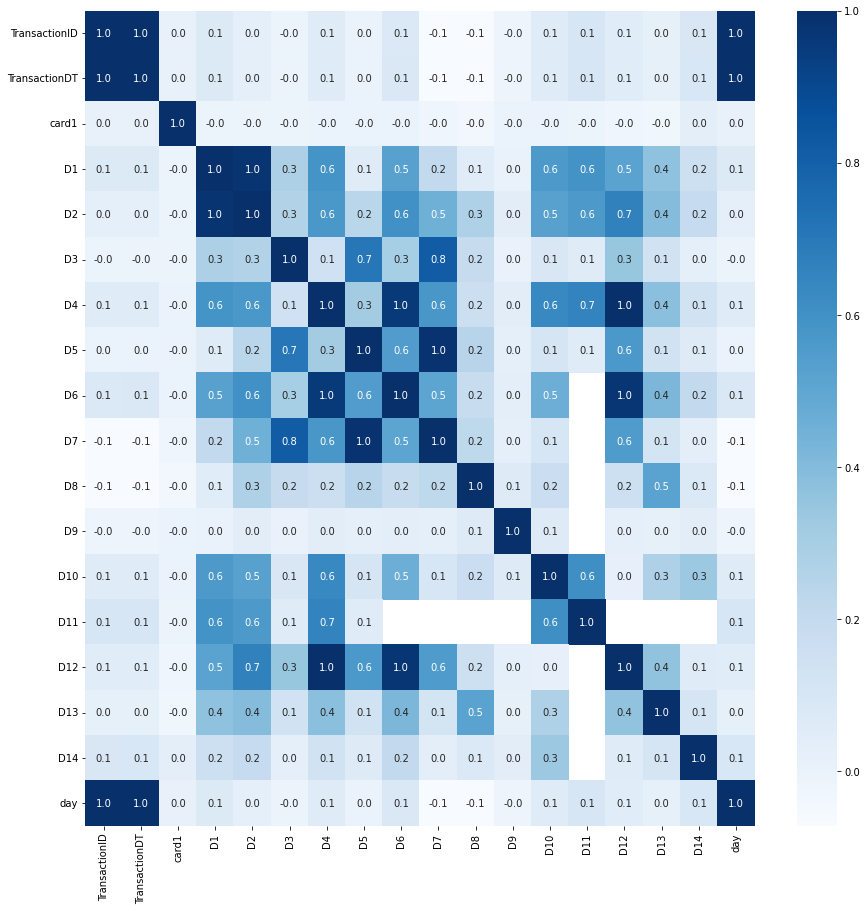

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(data_train_full.corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

In [ ]:
D4=D6, D6=D12, D7=D5, D3=D7, D1=D2, D2=D12

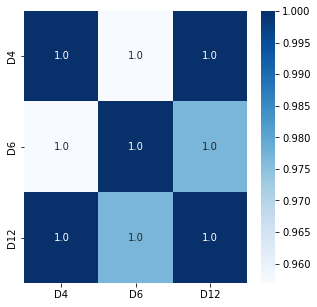

In [71]:
plt.figure(figsize=(5,5))
sns.heatmap(data_train_full[['D4', 'D6', 'D12']].corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

In [72]:
print('D4', round(data_train_full['D4'].isna().sum()/data_train_full.shape[0],2))
print('D6',round(data_train_full['D6'].isna().sum()/data_train_full.shape[0],2))
print('D12',round(data_train_full['D12'].isna().sum()/data_train_full.shape[0],2))

D4 0.29
D6 0.88
D12 0.89


In [73]:
data_train_full[~data_train_full['D4'].isna()]

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day
1,2987001,86401,2755,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,86401.0
2,2987002,86469,4663,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,86469.0
3,2987003,86499,18132,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,86387.0
5,2987005,86510,5937,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,86510.0
6,2987006,86522,12308,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,86522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,15811030,5812,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,15811030.0
590536,3577536,15811049,10444,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,15811049.0
590537,3577537,15811079,12037,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,15811079.0
590538,3577538,15811088,7826,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,15811066.0


In [78]:
data_train_full[~data_train_full['D12'].isna()].query('D4!=D12')['D4'].unique()

array([nan, 33.])

In [79]:
data_train_full[~data_train_full['D6'].isna()].query('D4!=D6')['D4'].unique()

array([ nan, 470., 455.,   0., 479., 581., 471., 348., 457., 368., 356.,
       444., 485., 475., 463., 492., 441., 466., 472., 486., 296., 448.,
       397., 454., 300., 452., 490., 467., 446., 420., 476., 449., 678.,
       458., 354., 353., 462., 487., 364., 359., 105., 317., 493., 357.,
       350., 542., 697., 231., 141., 498., 453., 339., 560., 178., 482.,
       202., 686.,  12., 365., 604., 494., 574.,   1., 367., 109., 488.,
       465.,  43., 456., 715., 358., 473., 160., 431.,   7., 620., 426.,
       464., 497., 362., 139., 370., 469., 674., 361., 394., 468., 386.,
       322., 523., 285., 461.,  30., 273., 552., 360.,   2., 429., 506.,
       369., 480.,  55., 410.,  24., 124., 714., 696., 327., 169., 655.,
       363., 504., 716., 375., 373., 210., 573., 683., 389., 451., 609.,
       553., 338., 505., 435., 366., 624., 188., 385., 309., 396.,   4.,
       721., 474., 315., 563., 500., 133., 509., 594., 372., 153., 709.,
       225., 207., 491., 685., 263.,  14., 400.,  1

D4 заполнить данными из D12, где D4 = Nan, D12 - удаляем

Сделать столбец D6r=D6-D4

In [81]:
data_train_full['D4'].fillna(data_train_full['D12'], inplace=True)

In [84]:
data_train_full[~data_train_full['D4'].isna()]

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day
1,2987001,86401,2755,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,86401.0
2,2987002,86469,4663,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,86469.0
3,2987003,86499,18132,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,86387.0
5,2987005,86510,5937,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,86510.0
6,2987006,86522,12308,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,86522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,15811030,5812,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,15811030.0
590536,3577536,15811049,10444,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,15811049.0
590537,3577537,15811079,12037,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,15811079.0
590538,3577538,15811088,7826,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,15811066.0


In [85]:
data_train_full['D6'].fillna(0, inplace=True)

In [86]:
data_train_full['D6r']=data_train_full['D4']-data_train_full['D6']

In [87]:
data_train_full['D6r'].value_counts()

 0.0      188919
 1.0        3769
 2.0        2560
 7.0        1950
 3.0        1946
           ...  
-26.0          1
 704.0         1
-122.0         1
 706.0         1
 869.0         1
Name: D6r, Length: 859, dtype: int64

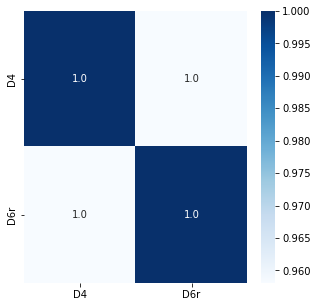

In [88]:
plt.figure(figsize=(5,5))
sns.heatmap(data_train_full[['D4', 'D6r']].corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

Оставляем дозаполненную D4

In [ ]:
D4=D6, D6=D12, D7=D5, D3=D7, D1=D2, D2=D12

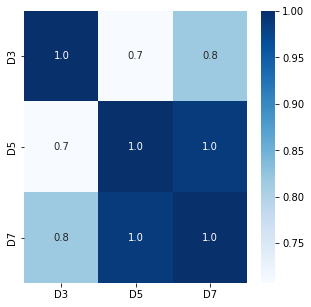

In [89]:
plt.figure(figsize=(5,5))
sns.heatmap(data_train_full[['D3', 'D5', 'D7']].corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

In [90]:
print('D3', round(data_train_full['D3'].isna().sum()/data_train_full.shape[0],2))
print('D5',round(data_train_full['D5'].isna().sum()/data_train_full.shape[0],2))
print('D7',round(data_train_full['D7'].isna().sum()/data_train_full.shape[0],2))

D3 0.45
D5 0.52
D7 0.93


D7 удаляем D3, D5 оставляем

In [91]:
data_train_full[~data_train_full['D3'].isna()]

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day,D6r
0,2987000,86400,13926,14.0,NaN,13.0,NaN,NaN,0.0,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,86386.0,NaN
3,2987003,86499,18132,112.0,112.0,0.0,94.0,0.0,0.0,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,86387.0,94.0
9,2987009,86536,17399,61.0,61.0,30.0,318.0,30.0,0.0,NaN,NaN,NaN,40.0,302.0,NaN,NaN,NaN,86475.0,318.0
10,2987010,86549,16496,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,86548.0,0.0
12,2987012,86564,3786,72.0,72.0,11.0,107.0,11.0,0.0,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,86492.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590532,3577532,15811007,12037,315.0,315.0,315.0,315.0,315.0,0.0,NaN,NaN,NaN,315.0,0.0,NaN,NaN,NaN,15810692.0,315.0
590533,3577533,15811029,13071,6.0,6.0,6.0,6.0,6.0,0.0,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,15811023.0,6.0
590535,3577535,15811047,6550,29.0,29.0,30.0,NaN,NaN,0.0,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,15811018.0,NaN
590538,3577538,15811088,7826,22.0,22.0,0.0,22.0,0.0,0.0,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,15811066.0,22.0


In [94]:
data_train_full[~data_train_full['D7'].isna()].query('D3!=D7')

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day,D6r
38,2987038,87172,5463,542.0,542.0,NaN,NaN,NaN,537.0,4.0,29.000000,0.000000,520.0,NaN,NaN,NaN,NaN,86630.0,NaN
40,2987040,87209,13329,0.0,NaN,NaN,0.0,0.0,0.0,0.0,83.000000,0.000000,0.0,NaN,0.0,0.0,0.0,87209.0,0.0
69,2987069,87725,12866,0.0,NaN,NaN,NaN,NaN,216.0,4.0,126.000000,0.000000,284.0,NaN,NaN,NaN,NaN,87725.0,NaN
199,2987199,89665,15885,0.0,NaN,NaN,398.0,48.0,398.0,48.0,NaN,NaN,0.0,NaN,398.0,0.0,0.0,89665.0,0.0
205,2987205,89793,1085,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,89793.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590351,3577351,15807131,3289,0.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN,1.0,0.0,NaN,15807131.0,0.0
590354,3577354,15807171,14337,0.0,NaN,NaN,1.0,0.0,1.0,0.0,0.916666,0.916666,0.0,NaN,1.0,0.0,NaN,15807171.0,0.0
590365,3577365,15807651,18090,70.0,70.0,70.0,70.0,55.0,70.0,55.0,70.958336,0.958333,0.0,NaN,70.0,70.0,0.0,15807581.0,0.0
590397,3577397,15808209,5812,0.0,NaN,NaN,4.0,4.0,4.0,4.0,267.958340,0.958333,0.0,NaN,4.0,267.0,0.0,15808209.0,0.0


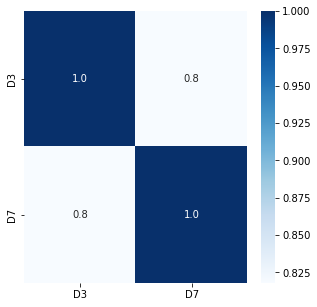

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(data_train_full[~data_train_full['D7'].isna()][['D3','D7']].corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

Вычтем из D2 D1, проверим корреляцию

In [98]:
data_train_full['D2'].fillna(0, inplace=True)

In [99]:
data_train_full['D2r']=data_train_full['D2']-data_train_full['D1']

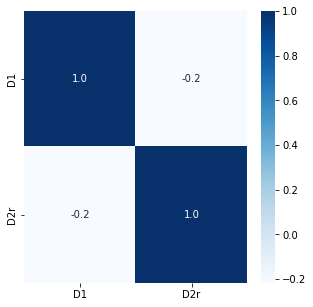

In [100]:
plt.figure(figsize=(5,5))
sns.heatmap(data_train_full[~data_train_full['D2r'].isna()][['D1','D2r']].corr(),cbar=True,cmap='Blues', annot=True, fmt='.1f')

* **D1 --- 0.0**
** D2 --- 0.48 **D2r** - оставим
* **D3 --- 0.45**
* **D4 --- 0.29**
** D5 --- 0.52
** D6 --- 0.88
** D7 --- 0.93
* D8 --- 0.87
* D9 --- 0.87
* **D10 --- 0.13**
* **D11 --- 0.47**
** D12 --- 0.89
* D13 --- 0.9
* D14 --- 0.89

In [101]:
data_train_full['D8'].unique()

array([      nan,  83.     ,  26.     , ..., 390.95834, 377.95834,
       548.9583 ])

In [102]:
data_train_full['D9'].unique()

array([     nan, 0.      , 0.041666, 0.083333, 0.125   , 0.166666,
       0.208333, 0.25    , 0.291666, 0.333333, 0.416666, 0.458333,
       0.5     , 0.541666, 0.583333, 0.625   , 0.666666, 0.708333,
       0.75    , 0.791666, 0.833333, 0.875   , 0.916666, 0.958333,
       0.375   ])

In [104]:
data_train_full['D13'].unique()

array([ nan,   0.,  24.,  18.,  21.,  58., 367.,  47., 289.,  60., 229.,
       245.,   1.,  90.,  75., 119.,  56.,   2.,  71., 210., 295.,   3.,
       303., 122., 254., 275.,  39., 305.,  13.,  23., 172.,  31.,   7.,
        97., 118., 312., 357.,  78.,   4., 258., 110.,  16., 606., 313.,
         9., 370., 544., 184., 699., 368., 342.,  17., 298.,  62.,  28.,
       371., 225.,  88., 169., 111.,  81., 125.,  48.,  51., 355.,  82.,
       166., 307., 294.,   5.,  19., 264.,  20.,  42.,  68., 216., 185.,
       230.,  29.,  43., 335., 591., 131., 369., 356., 365.,  49., 261.,
        34.,  10.,  33., 672., 330.,  77.,  63., 236., 197., 306., 175.,
        15.,  83.,   6., 252.,  37.,  22., 376., 375., 262., 259.,  35.,
       300., 227., 359., 296., 311., 138.,  44.,  11., 301., 309., 141.,
        50.,  14., 354.,  55.,  95., 187.,  57., 100., 136., 702., 121.,
       448.,  67., 207., 145., 696., 322., 256., 163., 361., 406.,  79.,
         8.,  36.,  40.,  32., 226., 282.,  64., 35

In [105]:
data_train_full['D14'].unique()

array([  nan,    0.,   98.,   97.,    2.,   18.,   50.,  386.,  301.,
        337.,   46.,   87.,  164.,  298.,  244.,  369.,  123.,  368.,
         21.,   13.,   22.,   71.,  170.,    1.,   57.,  328.,  327.,
        230.,  696.,   17.,  330.,   36.,    3.,  204.,  498.,  543.,
        375.,  178.,  598.,  361.,  189.,  197.,  147.,  253., -193.,
        112.,   86.,  595.,  241.,  214.,  693.,  306.,  -83.,  268.,
        259.,   33.,  255.,  437.,  309.,  323.,  163.,  152.,  363.,
         34.,   84.,  277.,  252.,  332.,   24.,   16.,  380.,  453.,
        364.,  440.,  114.,  250.,  263.,  124.,   44.,  286.,  353.,
        155.,   35.,  136.,   88.,  347.,   61.,  372.,  212.,   29.,
         60.,  443.,  585.,  258.,  226.,    8.,   95.,  344.,  243.,
         23.,  143.,   51.,  345.,   65.,  340.,  545.,  394.,  307.,
          7.,  209.,   89.,  418.,  351.,  465.,   20.,  385.,  501.,
        605.,    6.,  295.,  283.,  213.,    4.,  467.,  317.,   72.,
        362.,  382.,

In [106]:
data_train_full[~data_train_full['D8'].isna()]

,TransactionID,TransactionDT,card1,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,day,D6r,D2r
10,2987010,86549,16496,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.000000,0.000000,0.0,NaN,0.0,0.0,0.0,86548.0,0.0,0.0
16,2987016,86620,1790,0.0,0.0,NaN,NaN,NaN,0.0,NaN,26.000000,0.000000,NaN,NaN,NaN,NaN,NaN,86620.0,NaN,0.0
17,2987017,86668,11492,0.0,0.0,NaN,NaN,NaN,0.0,NaN,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,86668.0,NaN,0.0
38,2987038,87172,5463,542.0,542.0,NaN,NaN,NaN,537.0,4.0,29.000000,0.000000,520.0,NaN,NaN,NaN,NaN,86630.0,NaN,0.0
40,2987040,87209,13329,0.0,0.0,NaN,0.0,0.0,0.0,0.0,83.000000,0.000000,0.0,NaN,0.0,0.0,0.0,87209.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590501,3577501,15810344,3154,0.0,0.0,0.0,1.0,0.0,1.0,0.0,279.958340,0.958333,0.0,NaN,1.0,0.0,1.0,15810344.0,0.0,0.0
590506,3577506,15810402,16075,NaN,0.0,NaN,NaN,NaN,0.0,NaN,548.958300,0.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590509,3577509,15810491,16136,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.958333,0.958333,0.0,NaN,0.0,0.0,452.0,15810491.0,0.0,0.0
590521,3577521,15810802,12019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.958333,0.958333,0.0,NaN,0.0,0.0,0.0,15810802.0,0.0,0.0


In [107]:
path_to_data = '/content/drive/MyDrive/Classroom/feature_import_01_02.csv'
feature_imortans_second = pd.read_csv(path_to_data)
feature_imortans_second.head()

,feature,importance
0,card1,6.793614
1,TransactionAmt,4.716888
2,addr1,4.192885
3,C13,3.768942
4,card2,3.475234


In [112]:
feature_imortans_second

,feature,importance
0,card1,6.793614
1,TransactionAmt,4.716888
2,addr1,4.192885
3,C13,3.768942
4,card2,3.475234
...,...,...
419,V329,0.000000
420,V330,0.000000
421,V333,0.000000
422,V335,0.000000


In [119]:

feature_imortans_second.query('feature in ("D8", "D9", "D13", "D14")')

,feature,importance
32,D8,0.726352
47,D13,0.403024
102,D14,0.158346
163,D9,0.056784


In [120]:
feature_imortans_second.query('feature in ("D5", "D6", "D7", "D12")')

,feature,importance
26,D5,1.239354
75,D12,0.234463
130,D6,0.102225
138,D7,0.085670


In [121]:
feature_imortans_second.query('feature in ("D1", "D2", "D3", "D4")')

,feature,importance
5,D2,2.996605
14,D1,1.842431
17,D4,1.504991
23,D3,1.397952


Итак: Удаляем D6, D7, D12, D14, D13